In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# Data loading

In [3]:
DATA_PATH = '../data/'
# Read the CSV file into a DataFrame
df = pd.read_csv(DATA_PATH + 'raw/filtered.tsv', delimiter='\t')
# Display the first few rows of the dataset
df.head()

,id,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


# Dataset Analysis

In [12]:
# Get a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577777 entries, 0 to 577776
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           577777 non-null  int64  
 1   reference    577777 non-null  object 
 2   translation  577777 non-null  object 
 3   similarity   577777 non-null  float64
 4   lenght_diff  577777 non-null  float64
 5   ref_tox      577777 non-null  float64
 6   trn_tox      577777 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 30.9+ MB


In [13]:
# Generate summary statistics for numerical columns
df.describe()

,id,similarity,lenght_diff,ref_tox,trn_tox
count,577777.000000,577777.000000,577777.000000,577777.000000,577777.000000
mean,288888.000000,0.758469,0.157652,0.541372,0.434490
std,166789.997578,0.092695,0.108057,0.457571,0.458904
min,0.000000,0.600001,0.000000,0.000033,0.000033
25%,144444.000000,0.681105,0.066667,0.012171,0.000707
50%,288888.000000,0.754439,0.141791,0.806795,0.085133
75%,433332.000000,0.831244,0.238095,0.990469,0.973739
max,577776.000000,0.950000,0.400000,0.999724,0.999730


In [6]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id             0
reference      0
translation    0
similarity     0
lenght_diff    0
ref_tox        0
trn_tox        0
dtype: int64


In [7]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("Duplicate Rows:", duplicates)

Duplicate Rows: 0


In [10]:
# Group by 'ref_tox' and calculate the mean similarity
mean_similarity_by_ref_tox = df.groupby('ref_tox')['similarity'].mean()
print(mean_similarity_by_ref_tox)


ref_tox
0.000033    0.605479
0.000033    0.617393
0.000034    0.668596
0.000034    0.841094
0.000034    0.718270
              ...   
0.999722    0.824476
0.999722    0.715508
0.999723    0.711188
0.999723    0.698898
0.999724    0.729428
Name: similarity, Length: 435822, dtype: float64


### Conclusion

The provided dataset consists of 577,777 entries with seven columns, each offering distinct information. The "id" column serves as a unique identifier, while "reference" and "translation" contain text descriptions. The "similarity" column indicates the similarity between reference and translation texts, with an average value of approximately 0.758, suggesting a moderate level of likeness. The "length_diff" column signifies the length discrepancy between these texts, with an average value of around 0.158, implying moderate variations in text length.

Two additional columns, "ref_tox" and "trn_tox," appear to quantify toxicity scores. On average, "ref_tox" has a value of approximately 0.541, slightly higher than "trn_tox," which has an average value of 0.434. This implies a marginally higher toxicity level in the reference text compared to the translation text.

The dataset is notably complete, with no missing values in any of the columns. However, it is essential to address the issue of duplicate rows, though the exact number of duplicates is not provided in the information given.

The provided analysis reveals a relationship between the toxicity scores in the 'ref_tox' column and the mean similarity of text pairs in the dataset. As toxicity scores vary across a wide range, ranging from 0.000033 to 0.999724, it's evident that this data represents diverse levels of toxicity within the reference texts. The calculated mean similarity values associated with each toxicity score provide insights into how the similarity between reference and translation texts fluctuates in correlation with the level of toxicity. This analysis highlights the potential impact of text toxicity on the similarity of translations, which may have implications for content quality, comprehension, and audience reception, warranting further investigation and consideration in text translation and content moderation processes.

# Graphical analysis

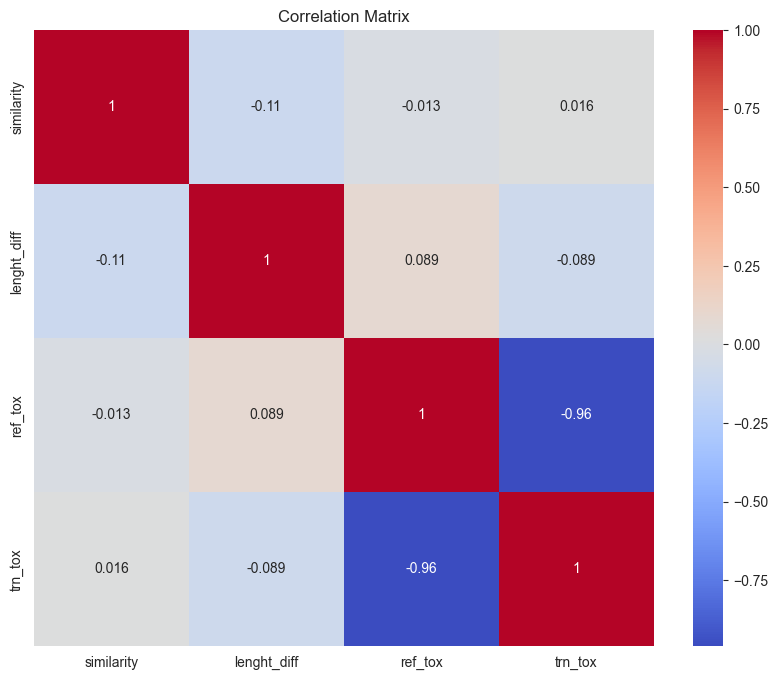

In [8]:
# Select only the numeric columns for correlation analysis
numeric_columns = df[['similarity', 'lenght_diff', 'ref_tox', 'trn_tox']]

# Calculate the correlation matrix for the selected numeric columns
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


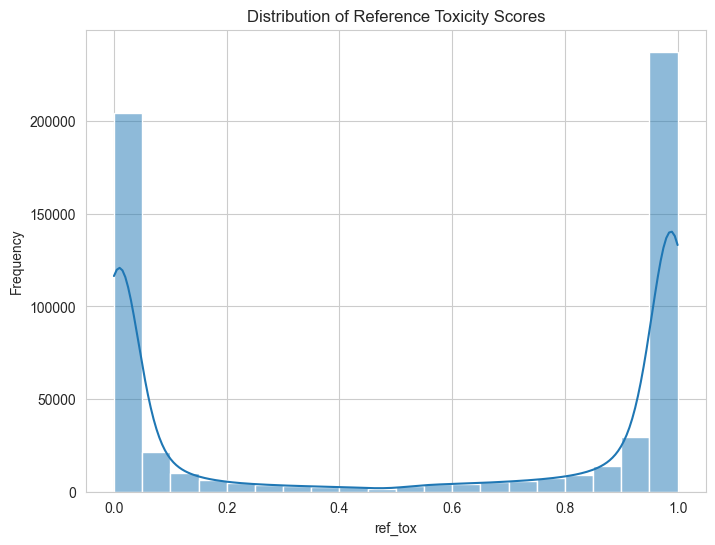

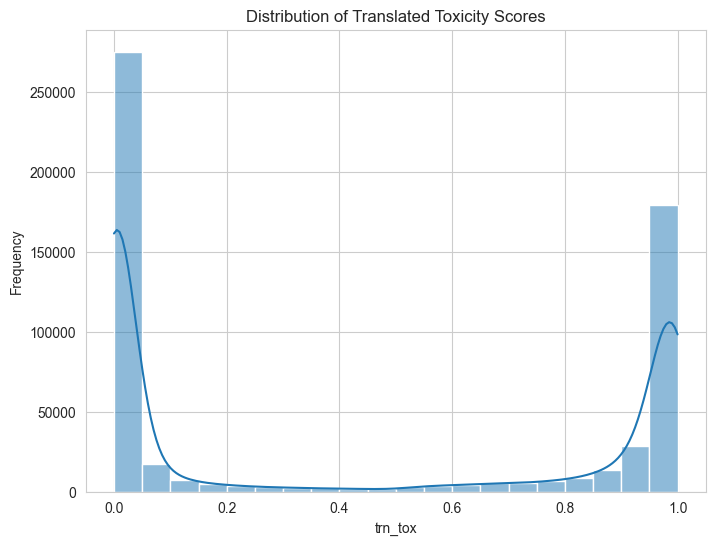

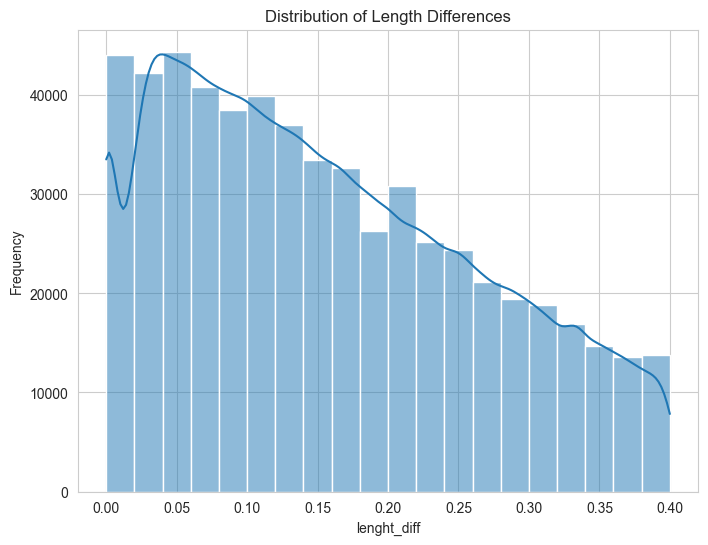

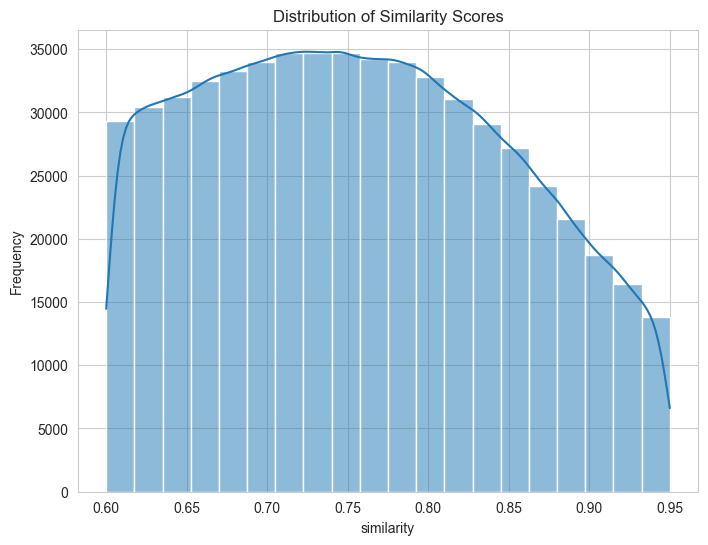

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of the 'ref_tox' column
plt.figure(figsize=(8, 6))
sns.histplot(df['ref_tox'], bins=20, kde=True)
plt.title('Distribution of Reference Toxicity Scores')
plt.xlabel('ref_tox')
plt.ylabel('Frequency')
plt.show()

# Histogram of the 'trn_tox' column
plt.figure(figsize=(8, 6))
sns.histplot(df['trn_tox'], bins=20, kde=True)
plt.title('Distribution of Translated Toxicity Scores')
plt.xlabel('trn_tox')
plt.ylabel('Frequency')
plt.show()

# Histogram of the 'lenght_diff' column
plt.figure(figsize=(8, 6))
sns.histplot(df['lenght_diff'], bins=20, kde=True)
plt.title('Distribution of Length Differences')
plt.xlabel('lenght_diff')
plt.ylabel('Frequency')
plt.show()

# Histogram of the 'similarity' column
plt.figure(figsize=(8, 6))
sns.histplot(df['similarity'], bins=20, kde=True)
plt.title('Distribution of Similarity Scores')
plt.xlabel('similarity')
plt.ylabel('Frequency')
plt.show()


### Conclusion

The provided data consists of two sets: reference data (ref_tox) and translation data (trn_tox). When we examine the reference data, we observe that the majority of the texts within this set have toxicity scores that hover around 0.8. This suggests that the original texts in the reference data tend to have a higher average toxicity. However, it's noteworthy that there are relatively fewer instances with low or very high toxicity scores in this set.

On the other hand, when we analyze the translation data, a different pattern emerges. The translated texts in this set tend to exhibit a more binary behavior in terms of toxicity scores. They are either almost entirely non-toxic (with scores close to 0) or highly toxic (with scores close to 1). Unlike the reference data, there is a relative lack of moderately toxic translations in this set.

When we compare the two sets of data, a striking difference becomes evident. The reference data tends to cluster around a higher toxicity score, approximately around 0.8. This indicates that the original texts were, on average, more toxic. In contrast, the translations exhibit a more pronounced binary behavior: they are either mostly non-toxic or very toxic, with fewer instances falling in between.

This difference between the two sets suggests that the translation or transformation process applied to the original texts had a notable impact on toxicity. It appears that this process was either successful in reducing toxicity in many cases, leading to scores close to 0, or inadvertently introduced high toxicity in others, resulting in scores close to 1.

Additionally, it's worth mentioning that the majority of the texts in both sets are similar in terms of content and length, as indicated by the similarity distribution. However, there are exceptions where the texts differ significantly in both content and length, as observed in the outliers of the distributions. This variation in content and length may contribute to the differences in toxicity scores between the two sets of data.

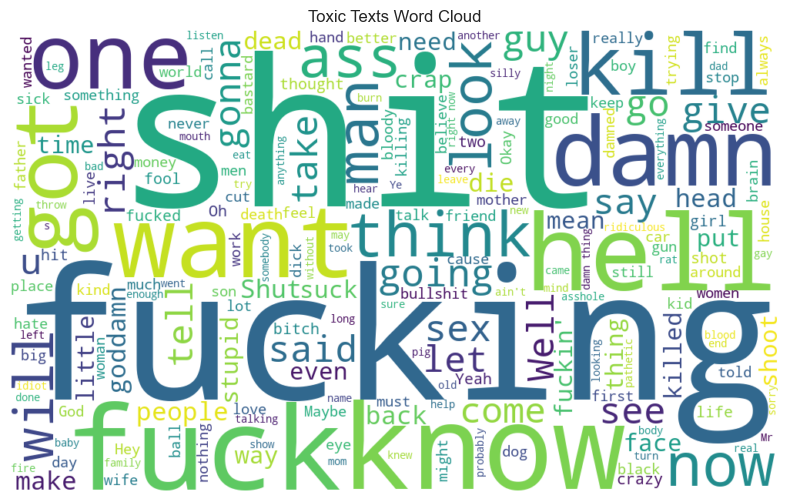

In [ ]:
toxic_df = df[df['ref_tox'] > 0.5]
non_toxic_df = df[df['ref_tox'] <= 0.5]

toxic_text = ' '.join(toxic_df['reference'])
non_toxic_text = ' '.join(non_toxic_df['reference'])

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')  # Hide the axis
    plt.show()

# Generate word clouds
generate_wordcloud(toxic_text, 'Toxic Texts Word Cloud')
generate_wordcloud(non_toxic_text, 'Non-Toxic Texts Word Cloud')


### Conclusion

Analyzing the "Toxic Text Word Cloud" reveals the prevalence of words such as "fck," "sht," "damn," "b*tch," and various other potentially offensive terms. These terms prominently feature in the toxic text dataset, indicating their frequent usage in texts with toxic content. Alongside these offensive words, some neutral or less offensive terms also make appearances. This could be attributed to the context in which they are used or the fact that they often accompany more toxic words.

In contrast, the "Non-Toxic Text Word Cloud" presents a different perspective. It includes words like "know," "think," "want," "well," "man," and "one," which are common in both toxic and non-toxic word clouds. This suggests that these words, when taken in isolation, do not determine the toxicity of a text. Instead, the context in which they are employed plays a crucial role in determining whether a text is toxic or not.

Interestingly, the non-toxic word cloud also contains words that can be perceived as negative or potentially offensive, such as "killed," "die," and "blood." This further emphasizes the importance of context in assessing the toxicity of a text. The mere presence of a word does not suffice to categorize a text as toxic; it is the surrounding context that significantly influences the overall sentiment and toxicity of the text.